# I/O example for voxel completion dataset

Here we demonstrate:

- Loading in a pickled voxel grid
- Converting the voxel grid to a mesh
- Plotting some vertices from this mesh
- Loading in an RGBD image + camera pose
- Displaying the image channels
- Reprojecting the image points to 3D
- Plotting these image points in the same axes as the mesh points

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# IO
import cPickle as pickle
import yaml

# Custom modules
import sys
sys.path.append('..')
from common import voxel_data
from common import mesh
from common import images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# setting the paths to the data we want to load
base_path = ('/media/michael/Seagate/phd_projects/'
             'volume_completion_data/data/oisin_house/data/')

base_path = ('/media/michael/Seagate/phd_projects/'
             'volume_completion_data/data/for_release/fold_0/')

scene_folder = base_path + 'saved_00169/'
image_path = scene_folder + 'poses/000035.yaml'
voxel_data_path = scene_folder + 'tsdf.dat'
voxel_meta_path = scene_folder + 'tsdf_meta.yaml'

## Loading and plotting the TSDF data

{'shape': (178, 136, 80), 'R': [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], 'T': [0, 0, 0], 'voxelsize': 0.005}


<matplotlib.colorbar.Colorbar instance at 0x7f668c27f878>

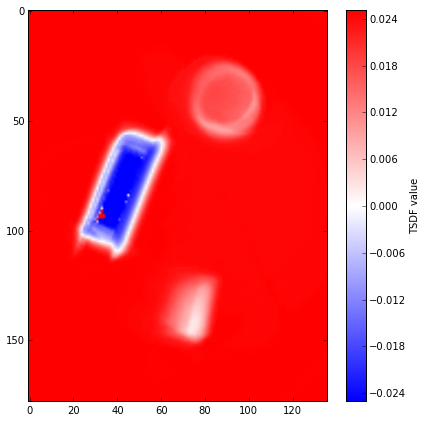

In [9]:
# Before calling load_voxels, we must have 'common' on the path
# This is done above, in the line:
#  sys.path.append('..')
vox = voxel_data.WorldVoxels.load_from_dat(
    voxel_data_path, voxel_meta_path)

# Plotting a slice through the TSDF
vox_slice = vox.V[:, :, vox.V.shape[2] / 2]
vox_slice[np.isnan(vox_slice)] = np.nanmin(vox_slice)

plt.figure(figsize=(7, 7))
plt.imshow(vox_slice, cmap = 'bwr')
plt.colorbar(label='TSDF value')

## Converting voxel data to mesh and plotting

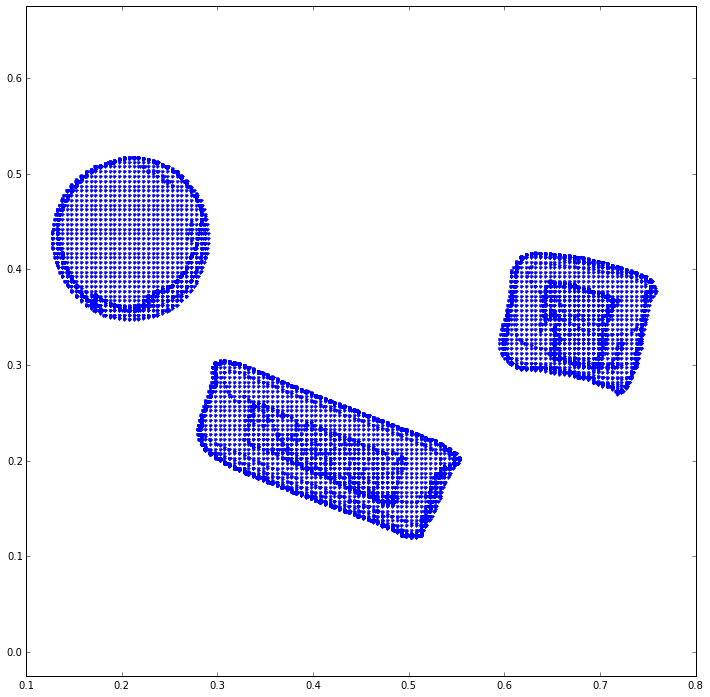

In [10]:
# converting voxel data to a mesh, using marching cubes
ms = mesh.Mesh()
ms.from_volume(vox)

# extract vertices from mesh above a certain height
ms_x, ms_y, ms_z = ms.vertices.T
threshold = (np.nanmin(ms_z) + np.nanmax(ms_z)) / 2.0
idxs_to_plot = ms_z > threshold

# plotting these vertices
plt.figure(figsize=(12, 12))
plt.plot(ms_x[idxs_to_plot], ms_y[idxs_to_plot], '.')
plt.axis('equal');

## Loading and displaying the image data

Couldn't load  /media/michael/Seagate/phd_projects/volume_completion_data/data/for_release/fold_0/saved_00169//frames/mask_01_0035.png
RGB image has shape: (480, 640, 3)
Depth image has shape: (480, 640)


AttributeError: 'RGBDImage' object has no attribute 'mask'

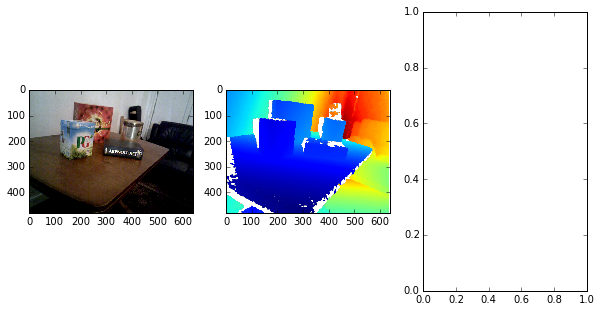

In [11]:
# loading in image data
image_dict = yaml.load(open(image_path))
im = images.RGBDImage.load_from_dict(scene_folder, image_dict)

# displaying image
plt.figure(figsize=(10, 5))
im.print_info()
im.disp_channels()

In [ ]:
# projecting the depth image into 3D and plotting
im_xyz = im.get_world_xyz()
plt.figure(figsize=(10, 5))
plt.plot(im_xyz[:, 0], im_xyz[:, 1], '.', ms=0.5)
plt.axis('equal')

## Plotting depth image in the same axes as the mesh

In [ ]:
# Plotting the mesh in the same coordinates as the depth image
plt.figure(figsize=(10, 5))
plt.plot(im_xyz[:, 0], im_xyz[:, 1], '.', ms=0.5)
plt.plot(ms_x[idxs_to_plot], ms_y[idxs_to_plot], '.r')
plt.axis('equal')